### Problem Statement
* A real estate company wants to analyze house price data from the Delhi region to understand which factors like area, bedrooms, and bathrooms affect property prices.
* Using these factors, the company aims to build a linear model to predict house prices accurately and understand how each factor influences the price.


### Step-1 Reading and understanding the dataset

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Housing.csv")
df.head(25)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [3]:
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


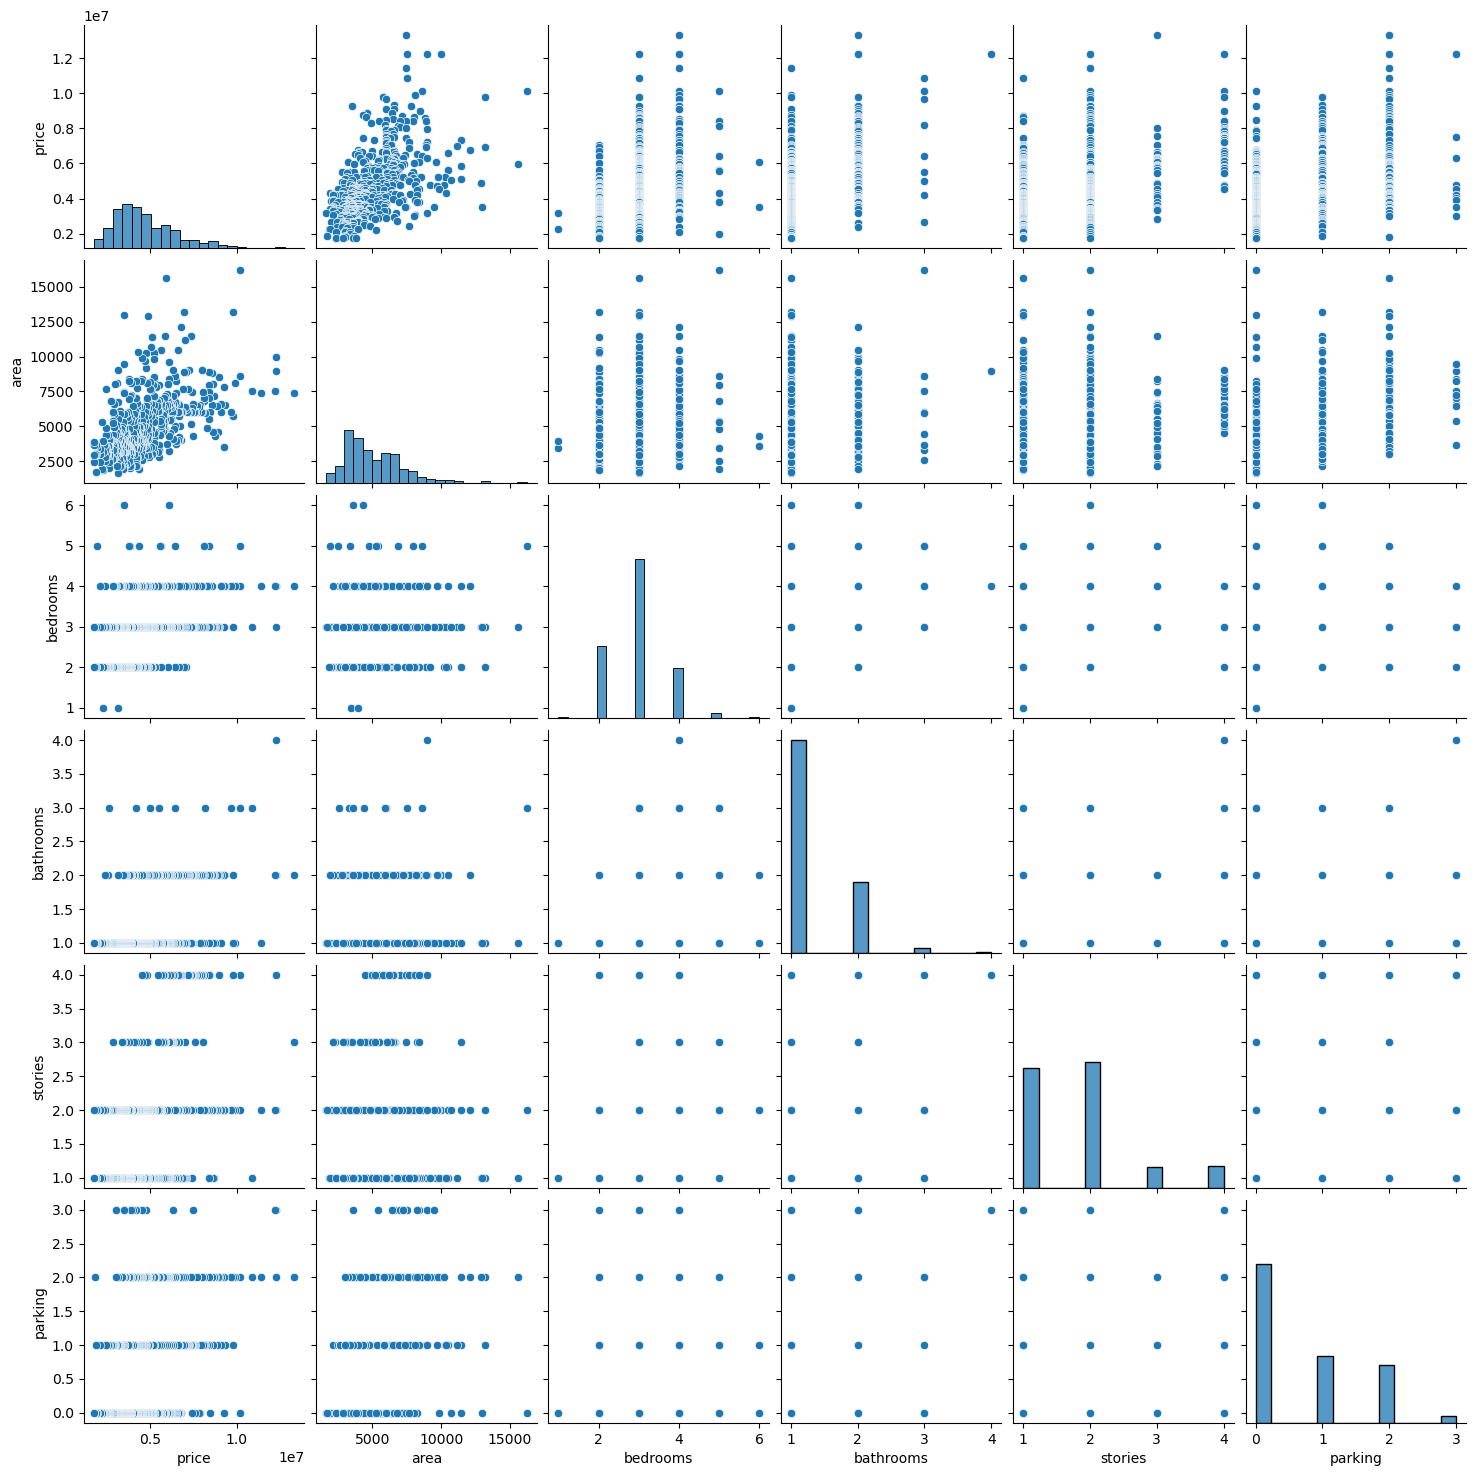

In [6]:
#visualising the numerical variables
sns.pairplot(df)
plt.show()

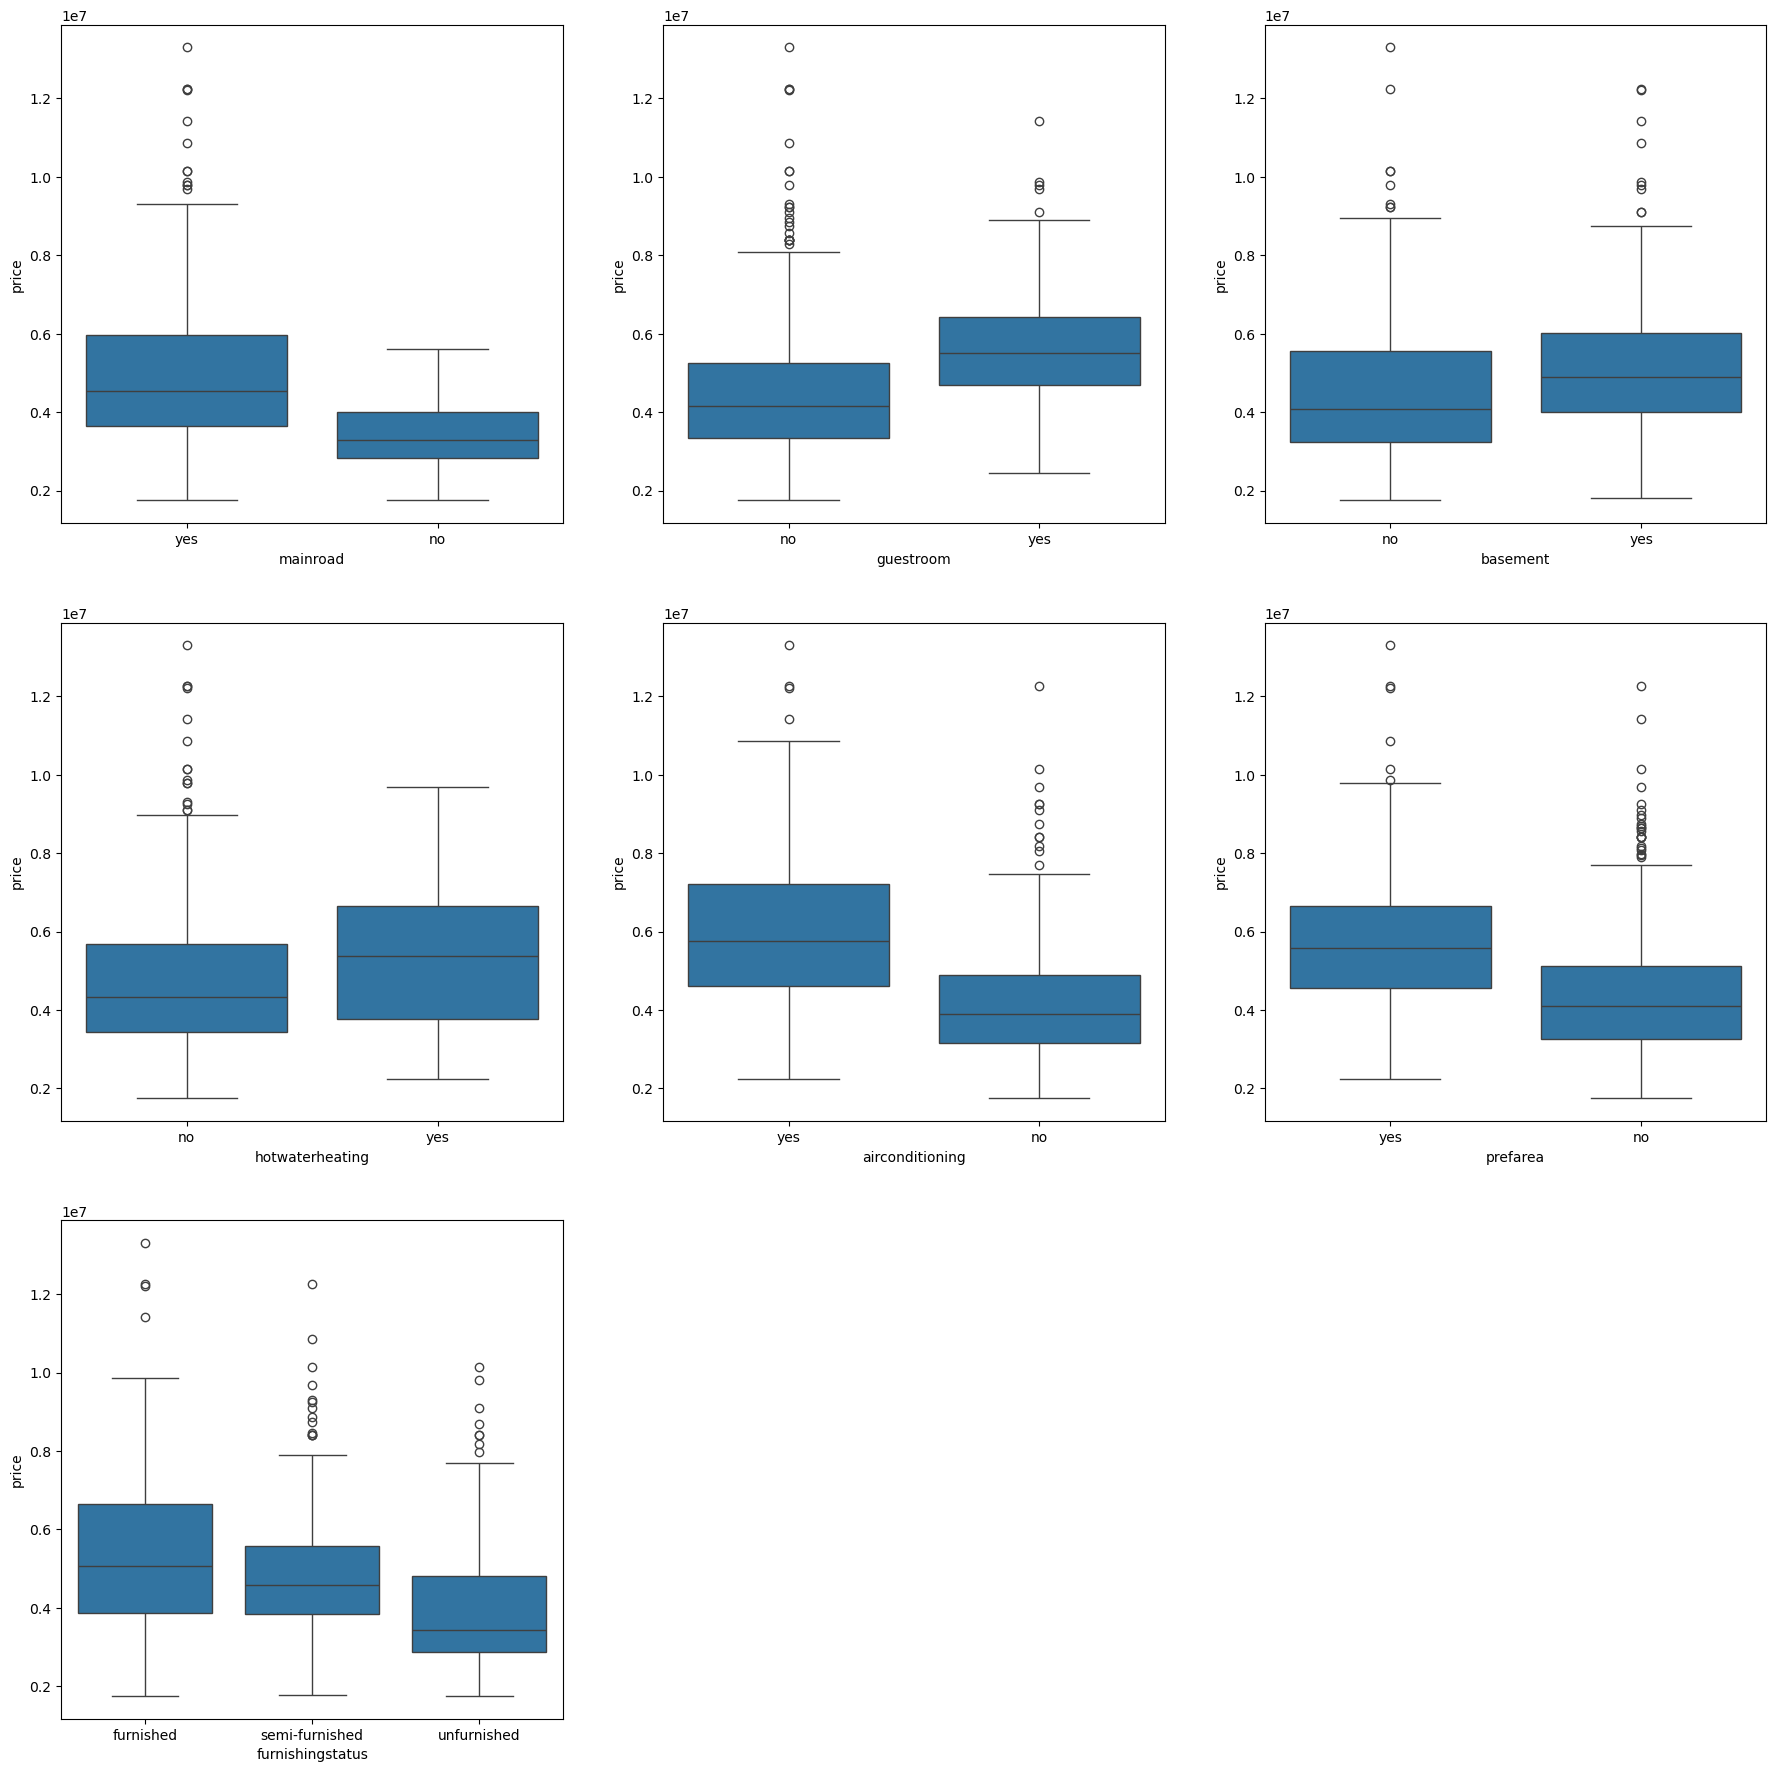

In [7]:
#Visualising Categorical variables
plt.figure(figsize=(22,22))
plt.subplot(3,3,1)
sns.boxplot(x="mainroad",y="price",data=df)

plt.subplot(3,3,2)
sns.boxplot(x="guestroom",y="price",data=df)

plt.subplot(3,3,3)
sns.boxplot(x="basement",y="price",data=df)

plt.subplot(3,3,4)
sns.boxplot(x="hotwaterheating",y="price",data=df)

plt.subplot(3,3,5)
sns.boxplot(x="airconditioning",y="price",data=df)

plt.subplot(3,3,6)
sns.boxplot(x="prefarea",y="price",data=df)

plt.subplot(3,3,7)
sns.boxplot(x="furnishingstatus",y="price",data=df)
plt.show()

### Step-2 Data Preparation
    Encoding:-
    ->Converting Yes/No to 1/0.
    ->Converting other categorical variable to dummy variable.

In [8]:
varlist=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]
df[varlist]=df[varlist].apply(lambda x:x.map({"yes":1,"no":0}))
df[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [10]:
dummy=pd.get_dummies(df["furnishingstatus"],drop_first=True)
dummy

,semi-furnished,unfurnished
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
540,False,True
541,True,False
542,False,True
543,False,False


In [11]:
dumy=dummy.apply(lambda x:x.map({True:1,False:0}))
dumy.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [12]:
df=pd.concat([df,dumy],axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [13]:
df=df.drop("furnishingstatus",axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Step-2
->Splitting train test

->Re-scaling the variables

In [14]:
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


Why re-scaling?

Rescaling is needed so big numbers don’t overpower small numbers in a model. For example, area may be 5000 and bedrooms may be 3 — without scaling, the model thinks area is more important just because its value is bigger.

Re-scaling techniques:-

Min-max(normalisation):-(X[i/p]-Xmin)/(Xmax-Xmin) it maps values b/w (0,1) if outliers are there the it'll be mapped to exact 1.

Standerdisation:-(X-mean)/(std_dev) it doesn’t compress the data between a particular range as in min-max scaling, 
this is useful especially if there are extreme data points (outliers).

In [15]:
num_var=["area","bedrooms","bathrooms","stories","parking","price"]
df[num_var].head()

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


fit() → Learns parameters (like min and max) from the data.

transform() → Uses the learned parameters to change the data.

fit_transform() → Learns from the data and transforms it in one step.

In [16]:
sc=MinMaxScaler()
df_train[num_var]=sc.fit_transform(df_train[num_var])
df_train[num_var].head()

,area,bedrooms,bathrooms,stories,parking,price
359,0.155227,0.4,0.0,0.000000,0.333333,0.169697
19,0.403379,0.4,0.5,0.333333,0.333333,0.615152
159,0.115628,0.4,0.5,0.000000,0.000000,0.321212
35,0.454417,0.4,0.5,1.000000,0.666667,0.548133
28,0.538015,0.8,0.5,0.333333,0.666667,0.575758


In [17]:
df[num_var].describe()

,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


In [60]:
df_train.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


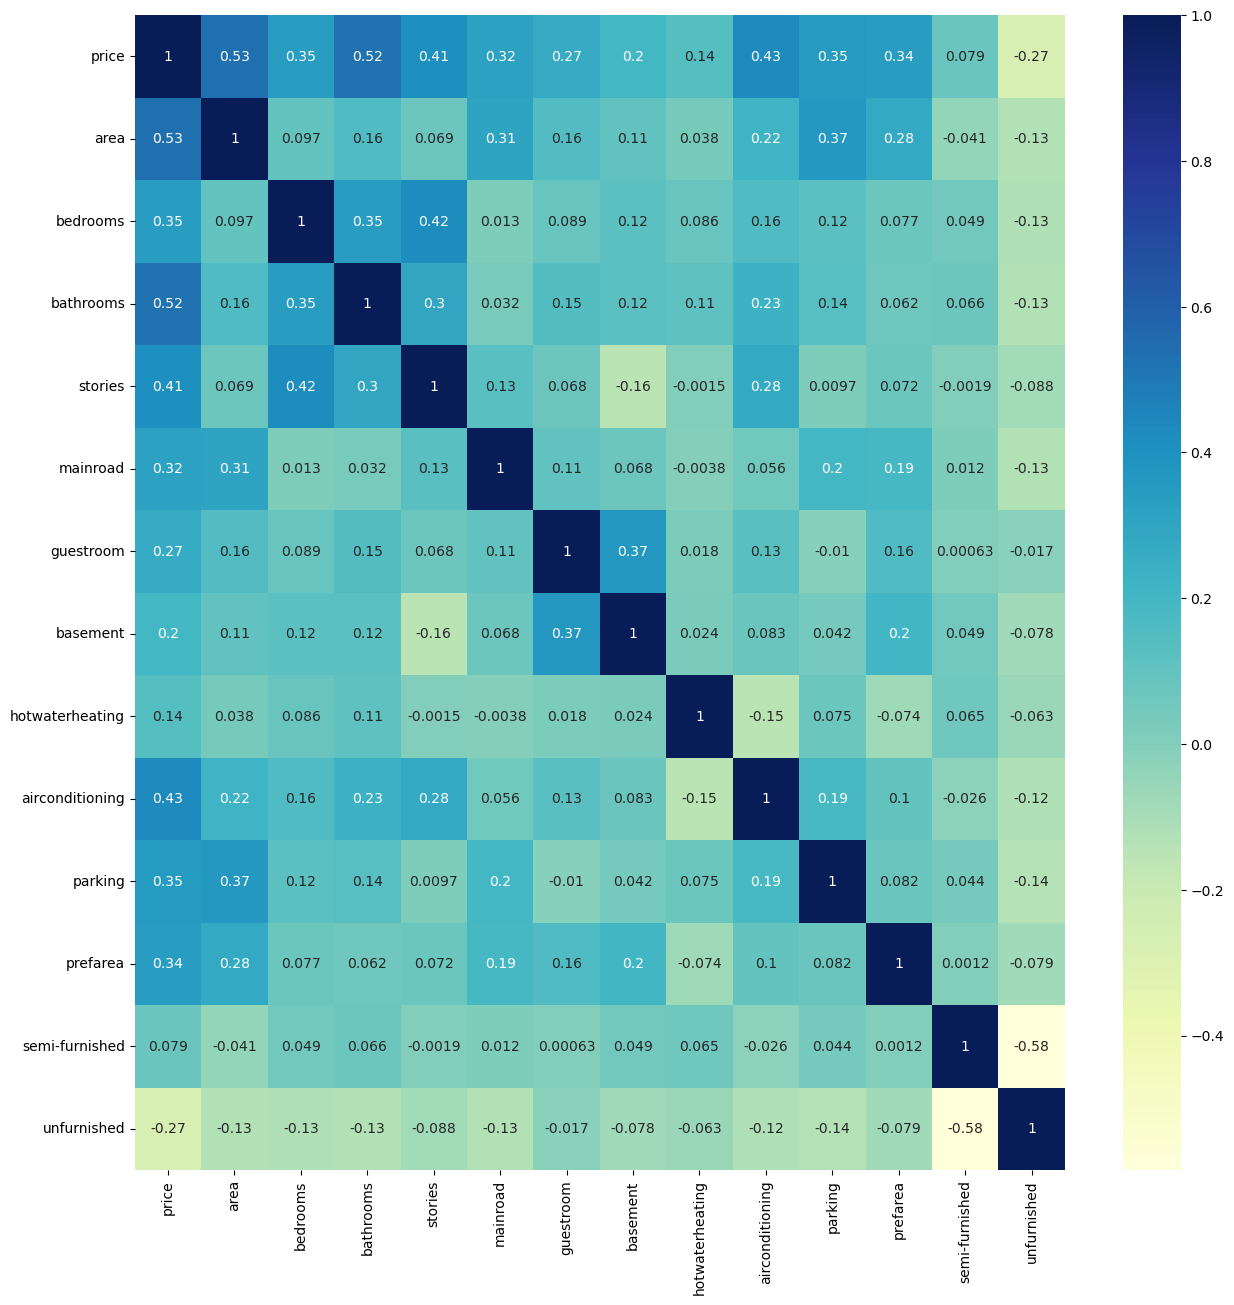

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Step-3
Training the model

In [19]:
df_train.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
price,1.000000,0.532025,0.349825,0.524246,0.409464,0.319208,0.265877,0.200743,0.141202,0.433162,0.352081,0.344543,0.078917,-0.270114
area,0.532025,1.000000,0.097462,0.163446,0.069274,0.308272,0.155665,0.106971,0.037719,0.215888,0.365658,0.279878,-0.040753,-0.131524
bedrooms,0.349825,0.097462,1.000000,0.346925,0.419582,0.012655,0.089488,0.120618,0.085818,0.161890,0.120363,0.076503,0.049111,-0.125921
bathrooms,0.524246,0.163446,0.346925,1.000000,0.295689,0.031716,0.150982,0.120857,0.112732,0.228315,0.138241,0.061584,0.065987,-0.128192
stories,0.409464,0.069274,0.419582,0.295689,1.000000,0.129427,0.068088,-0.155313,-0.001538,0.279779,0.009708,0.072192,-0.001883,-0.088199
mainroad,0.319208,0.308272,0.012655,0.031716,0.129427,1.000000,0.106875,0.067937,-0.003779,0.056375,0.200389,0.191465,0.012254,-0.129101
guestroom,0.265877,0.155665,0.089488,0.150982,0.068088,0.106875,1.000000,0.367345,0.018394,0.130300,-0.010240,0.161877,0.000632,-0.017198
basement,0.200743,0.106971,0.120618,0.120857,-0.155313,0.067937,0.367345,1.000000,0.023806,0.082892,0.042203,0.203933,0.049430,-0.077562
hotwaterheating,0.141202,0.037719,0.085818,0.112732,-0.001538,-0.003779,0.018394,0.023806,1.000000,-0.153801,0.074999,-0.074318,0.064641,-0.063025
airconditioning,0.433162,0.215888,0.161890,0.228315,0.279779,0.056375,0.130300,0.082892,-0.153801,1.000000,0.188132,0.099840,-0.026475,-0.123584


In [20]:
y_train=df_train.pop("price")
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

In [21]:
X_train=df_train
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


# Model building using statistical method
### ->Since the relation b/w price and area is good,start model building using these two variables.
### ->Feature selection will be done by the forward method

### Model building Type-1(Forward method)

In [22]:
df_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [23]:
X_train_sm=sm.add_constant(X_train["area"])
X_train_sm.head()

,const,area
359,1.0,0.155227
19,1.0,0.403379
159,1.0,0.115628
35,1.0,0.454417
28,1.0,0.538015


In [24]:
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [25]:
df_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [26]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Tue, 27 Jan 2026   Prob (F-statistic):           3.15e-29
Time:                        13:46:06   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [28]:
#Since r-squared is 0.28,about 28% of price has been affected by "area"

In [29]:
#observe heatmap and select the next highest relation
X_train_sm=sm.add_constant(X_train[["area","bathrooms"]])
X_train_sm.head()

,const,area,bathrooms
359,1.0,0.155227,0.0
19,1.0,0.403379,0.5
159,1.0,0.115628,0.5
35,1.0,0.454417,0.5
28,1.0,0.538015,0.5


In [30]:
#Train the model
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [31]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Tue, 27 Jan 2026   Prob (F-statistic):           2.51e-54
Time:                        13:46:06   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
##observe heatmap and select the next highest relation
X_train_sm=sm.add_constant(X_train[["area","bathrooms","bedrooms"]])
X_train_sm.head()

,const,area,bathrooms,bedrooms
359,1.0,0.155227,0.0,0.4
19,1.0,0.403379,0.5,0.4
159,1.0,0.115628,0.5,0.4
35,1.0,0.454417,0.5,0.4
28,1.0,0.538015,0.5,0.8


In [33]:
#Train the model
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 27 Jan 2026   Prob (F-statistic):           3.12e-57
Time:                        13:46:06   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#add another variable
X_train_sm=sm.add_constant(X_train[["area","bathrooms","bedrooms","airconditioning"]])
X_train_sm.head()

,const,area,bathrooms,bedrooms,airconditioning
359,1.0,0.155227,0.0,0.4,0
19,1.0,0.403379,0.5,0.4,1
159,1.0,0.115628,0.5,0.4,1
35,1.0,0.454417,0.5,0.4,1
28,1.0,0.538015,0.5,0.8,0


In [35]:
#Build the model 
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     118.5
Date:                Tue, 27 Jan 2026   Prob (F-statistic):           2.77e-65
Time:                        13:46:07   Log-Likelihood:                 319.19
No. Observations:                 381   AIC:                            -628.4
Df Residuals:                     376   BIC:                            -608.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0397      0.017      2.323      0.021       0.006       0.073
area                0.3546      0.031     11.530      0.000       0.294       0.415
bathrooms           0.2329      0.025      9.370      0.000       0.184       0.282
bedrooms            0.1598      0.039      4.066      0.000       0.083       0.237
airconditioning     0.0828      0.012      6.691      0.000       0.058       0.107
==============================================================================
Omnibus:                       57.748   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.632
Skew:                           0.761   Prob(JB):                     1.30e-30
Kurtosis:                       5.520   Cond. No.                         9.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
X_train_sm=sm.add_constant(X_train[["area","bathrooms","bedrooms","airconditioning","stories"]])
X_train_sm.head()

,const,area,bathrooms,bedrooms,airconditioning,stories
359,1.0,0.155227,0.0,0.4,0,0.000000
19,1.0,0.403379,0.5,0.4,1,0.333333
159,1.0,0.115628,0.5,0.4,1,0.000000
35,1.0,0.454417,0.5,0.4,1,1.000000
28,1.0,0.538015,0.5,0.8,0,0.333333


In [37]:
#model training
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     106.2
Date:                Tue, 27 Jan 2026   Prob (F-statistic):           1.30e-69
Time:                        13:46:07   Log-Likelihood:                 331.89
No. Observations:                 381   AIC:                            -651.8
Df Residuals:                     375   BIC:                            -628.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0443      0.017      2.672      0.008       0.012       0.077
area                0.3595      0.030     12.064      0.000       0.301       0.418
bathrooms           0.2155      0.024      8.860      0.000       0.168       0.263
bedrooms            0.0888      0.041      2.191      0.029       0.009       0.169
airconditioning     0.0695      0.012      5.668      0.000       0.045       0.094
stories             0.1034      0.020      5.084      0.000       0.063       0.143
==============================================================================
Omnibus:                       73.229   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.153
Skew:                           0.902   Prob(JB):                     1.27e-44
Kurtosis:                       6.079   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
X_train_sm=sm.add_constant(X_train[["area","bathrooms","bedrooms","airconditioning","stories","parking"]])
X_train_sm.head()

,const,area,bathrooms,bedrooms,airconditioning,stories,parking
359,1.0,0.155227,0.0,0.4,0,0.000000,0.333333
19,1.0,0.403379,0.5,0.4,1,0.333333,0.333333
159,1.0,0.115628,0.5,0.4,1,0.000000,0.000000
35,1.0,0.454417,0.5,0.4,1,1.000000,0.666667
28,1.0,0.538015,0.5,0.8,0,0.333333,0.666667


In [39]:
#model training
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     93.30
Date:                Tue, 27 Jan 2026   Prob (F-statistic):           3.15e-71
Time:                        13:46:07   Log-Likelihood:                 338.15
No. Observations:                 381   AIC:                            -662.3
Df Residuals:                     374   BIC:                            -634.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0430      0.016      2.633      0.009       0.011       0.075
area                0.3234      0.031     10.406      0.000       0.262       0.385
bathrooms           0.2108      0.024      8.787      0.000       0.164       0.258
bedrooms            0.0763      0.040      1.904      0.058      -0.002       0.155
airconditioning     0.0644      0.012      5.293      0.000       0.040       0.088
stories             0.1102      0.020      5.476      0.000       0.071       0.150
parking             0.0696      0.020      3.535      0.000       0.031       0.108
==============================================================================
Omnibus:                       62.894   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.716
Skew:                           0.808   Prob(JB):                     5.66e-35
Kurtosis:                       5.706   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
X_train_sm=sm.add_constant(X_train[["area","bathrooms","bedrooms","airconditioning","stories","parking","prefarea"]])
X_train_sm.head()

,const,area,bathrooms,bedrooms,airconditioning,stories,parking,prefarea
359,1.0,0.155227,0.0,0.4,0,0.000000,0.333333,0
19,1.0,0.403379,0.5,0.4,1,0.333333,0.333333,1
159,1.0,0.115628,0.5,0.4,1,0.000000,0.000000,0
35,1.0,0.454417,0.5,0.4,1,1.000000,0.666667,0
28,1.0,0.538015,0.5,0.8,0,0.333333,0.666667,0


In [41]:
#model training
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     91.33
Date:                Tue, 27 Jan 2026   Prob (F-statistic):           6.31e-77
Time:                        13:46:07   Log-Likelihood:                 354.04
No. Observations:                 381   AIC:                            -692.1
Df Residuals:                     373   BIC:                            -660.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0433      0.016      2.763      0.006       0.012       0.074
area                0.2780      0.031      8.997      0.000       0.217       0.339
bathrooms           0.2120      0.023      9.201      0.000       0.167       0.257
bedrooms            0.0687      0.039      1.784      0.075      -0.007       0.144
airconditioning     0.0623      0.012      5.330      0.000       0.039       0.085
stories             0.1071      0.019      5.540      0.000       0.069       0.145
parking             0.0727      0.019      3.843      0.000       0.035       0.110
prefarea            0.0696      0.012      5.698      0.000       0.046       0.094
==============================================================================
Omnibus:                       70.730   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.599
Skew:                           0.865   Prob(JB):                     7.50e-44
Kurtosis:                       6.085   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note:-
If Adjusted R² ↑ → keep the variable ✅

If Adjusted R² ↓ or stays same → stop  the iteration of adding variables❌

### Model Building Type-2(Backward method)

In backward method initially we'll be having complete dataset,then based on "Significance(P-value)" & "VIF" we will drop the columns to get the good accuracy.

VIF:-VIF (Variance Inflation Factor) tells us how much one feature is correlated with other features.

Low VIF → feature is independent ✅

High VIF → feature depends on other features ❌


In [42]:
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,1.0,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,1.0,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,1.0,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,1.0,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,1.0,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [43]:
#model training
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Tue, 27 Jan 2026   Prob (F-statistic):           8.83e-83
Time:                        13:46:07   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#Creating VIF
vif=pd.DataFrame()
vif["Features"]=X_train.columns
for i in range(X_train.shape[1]):   # i = 0, then 1, then 2
    vif.loc[i,"VIF"] = variance_inflation_factor(X_train.values, i)#vif.loc[row,col]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


# P-value & VIF algorithm:-
->high p & VIF = Remove values

->high & low scenarios:-
    
    i)High p,low VIF:-remove these first
    
    ii)low p,high VIF:-remove these after the ones above

->low p & VIF = Retain values

In [45]:
#now "semi-furnished" has high 'p-val' and "bedrooms" has high "VIF" value so remove 
X=X_train.drop("semi-furnished",axis=1)
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'unfurnished'],
      dtype='object')

In [46]:
X_sm=sm.add_constant(X)
X_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,1.0,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,1
19,1.0,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0
159,1.0,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0
35,1.0,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0
28,1.0,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,1


In [47]:
lr=sm.OLS(y_train,X_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Tue, 27 Jan 2026   Prob (F-statistic):           1.07e-83
Time:                        13:46:07   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif=pd.DataFrame()
vif["Features"]=X.columns
for i in range(X.shape[1]):
    vif.loc[i,"VIF"]=variance_inflation_factor(X.values,i)
vif=vif.sort_values(by="VIF",ascending=False)
vif


,Features,VIF
1,bedrooms,6.587321
4,mainroad,5.675433
0,area,4.670442
3,stories,2.689344
9,parking,2.122636
6,basement,2.011951
8,airconditioning,1.766562
2,bathrooms,1.666284
10,prefarea,1.505338
5,guestroom,1.469081


In [49]:
#Now the bedroom's "p-val" and "VIF" is higher so remove
new_X=X_sm.drop("bedrooms",axis=1)
new_X.head()

,const,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,1.0,0.155227,0.0,0.000000,1,0,0,0,0,0.333333,0,1
19,1.0,0.403379,0.5,0.333333,1,0,0,0,1,0.333333,1,0
159,1.0,0.115628,0.5,0.000000,1,1,1,0,1,0.000000,0,0
35,1.0,0.454417,0.5,1.000000,1,0,0,0,1,0.666667,0,0
28,1.0,0.538015,0.5,0.333333,1,0,1,1,0,0.666667,0,1


In [50]:
#add constant.
new_X_sm=sm.add_constant(new_X)
new_X_sm.head()

,const,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,1.0,0.155227,0.0,0.000000,1,0,0,0,0,0.333333,0,1
19,1.0,0.403379,0.5,0.333333,1,0,0,0,1,0.333333,1,0
159,1.0,0.115628,0.5,0.000000,1,1,1,0,1,0.000000,0,0
35,1.0,0.454417,0.5,1.000000,1,0,0,0,1,0.666667,0,0
28,1.0,0.538015,0.5,0.333333,1,0,1,1,0,0.666667,0,1


In [51]:
#Build the model
lr=sm.OLS(y_train,new_X_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Tue, 27 Jan 2026   Prob (F-statistic):           2.73e-84
Time:                        13:46:08   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif=pd.DataFrame()
vif["Features"]=new_X_sm.columns
for i in range(new_X_sm.shape[1]):
    vif.loc[i,"VIF"]=variance_inflation_factor(new_X_sm.values,i)
vif

,Features,VIF
0,const,10.133886
1,area,1.366459
2,bathrooms,1.210600
3,stories,1.265569
4,mainroad,1.168735
5,guestroom,1.220575
6,basement,1.274701
7,hotwaterheating,1.073092
8,airconditioning,1.243610
9,parking,1.224327


# Step-4:-Residual Analysis

In [53]:
y_train_pred=lr_model.predict(new_X_sm)

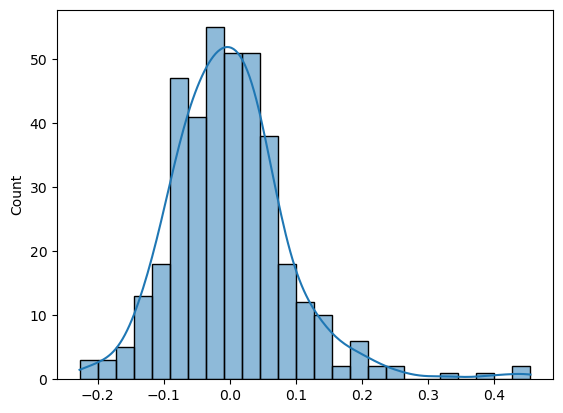

In [54]:
residual=y_train-y_train_pred
sns.histplot(residual,kde=True)
plt.show()

# Prediction and evaluation of test set

In [55]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0


In [56]:
#now scale the test data so that the model gives importance to all variables
num_var=["area","bedrooms","bathrooms","stories","parking","price"]
df_test[num_var].head()

,area,bedrooms,bathrooms,stories,parking,price
265,2880,3,1,2,0,4403000
54,6000,3,2,2,1,7350000
171,10269,3,1,1,1,5250000
244,5320,3,1,2,0,4550000
268,4950,4,1,2,0,4382000


In [57]:
df_test[num_var]=sc.transform(df_test[num_var])
df_test[num_var].head()

,area,bedrooms,bathrooms,stories,parking,price
265,0.091869,0.4,0.0,0.333333,0.000000,0.229697
54,0.366420,0.4,0.5,0.333333,0.333333,0.484848
171,0.742080,0.4,0.0,0.000000,0.333333,0.303030
244,0.306582,0.4,0.0,0.333333,0.000000,0.242424
268,0.274023,0.6,0.0,0.333333,0.000000,0.227879


In [58]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
y_test=df_test.pop("price")
y_test.head()

265    0.229697
54     0.484848
171    0.303030
244    0.242424
268    0.227879
Name: price, dtype: float64

In [63]:
X_test=df_test
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [64]:
#add constant
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [66]:
X_test_sm=X_test_sm.drop(["bedrooms","semi-furnished"],axis=1)
X_test_sm.head()

,const,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
265,1.0,0.091869,0.0,0.333333,1,0,0,0,0,0.000000,1,0
54,1.0,0.366420,0.5,0.333333,1,1,0,0,1,0.333333,0,0
171,1.0,0.742080,0.0,0.000000,1,0,0,0,0,0.333333,1,0
244,1.0,0.306582,0.0,0.333333,1,1,1,0,0,0.000000,1,0
268,1.0,0.274023,0.0,0.333333,1,0,0,0,1,0.000000,0,0


In [67]:
y_test_pred=lr_model.predict(X_test_sm)
y_test_pred.head()

265    0.204980
54     0.425613
171    0.339321
244    0.309397
268    0.254629
dtype: float64

In [71]:
#compute r-square for test data
r2_score(y_true=y_test,y_pred=y_test_pred)

0.6713505684480789

In [73]:
##compute r-square for train data
r2_score(y_true=y_train,y_pred=y_train_pred)

0.6800930630265902

In [74]:
X_test.shape

(164, 13)

In [75]:
y_test.shape

(164,)